In [2]:
import pandas as pd

df = pd.read_csv('partidos_cebollitas.csv')
df.head(10)

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML
5,2023-02-05,Data United,Cebollitas FC,3,3,60,40,8,11,Python Arena
6,2023-02-12,Data United,Real Pandas,4,1,49,51,4,8,Estadio ML
7,2023-02-19,Cebollitas FC,Real Pandas,1,2,56,44,5,5,Estadio ML
8,2023-02-26,NumPy City,Data United,1,5,60,40,9,9,Estadio DataCamp
9,2023-03-05,Atlético Python,Cebollitas FC,1,4,43,57,10,7,Estadio ML


In [ ]:
# Crear una nueva característica: diferencia de goles, esto nos puede ayudar a entender mejor el desempeño de los equipos

df['diferencia_goles'] = df['goles_local'] - df['goles_visitante']

df[['goles_local', 'goles_visitante', 'diferencia_goles']].head(10)

,goles_local,goles_visitante,diferencia_goles
0,2,0,2
1,1,5,-4
2,1,0,1
3,2,3,-1
4,5,3,2
5,3,3,0
6,4,1,3
7,1,2,-1
8,1,5,-4
9,1,4,-3


In [ ]:
# Crear una nueva característica: ratio de tiros al arco por posesión, esto nos puede ayudar a entender la eficiencia ofensiva del equipo

df['ratio_tiros_posesion_local'] = df['tiros_arco_local'] / df['posesion_local (%)']

df[['tiros_arco_local', 'posesion_local (%)', 'ratio_tiros_posesion_local']].head(10)


,tiros_arco_local,posesion_local (%),ratio_tiros_posesion_local
0,12,54,0.222222
1,12,60,0.200000
2,10,55,0.181818
3,3,57,0.052632
4,7,52,0.134615
5,8,60,0.133333
6,4,49,0.081633
7,5,56,0.089286
8,9,60,0.150000
9,10,43,0.232558


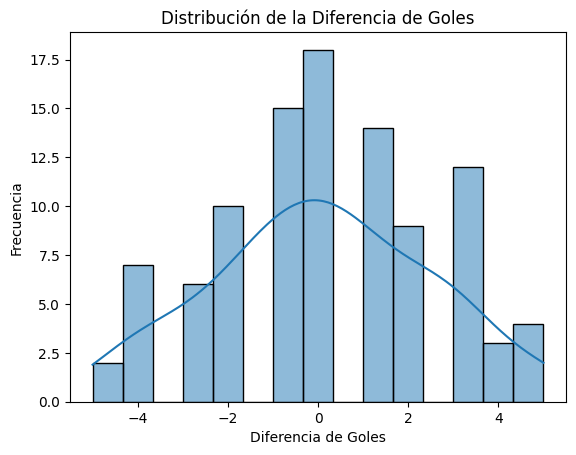

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['diferencia_goles'], bins=15, kde=True)
plt.title('Distribución de la Diferencia de Goles')
plt.xlabel('Diferencia de Goles')
plt.ylabel('Frecuencia')
plt.show()

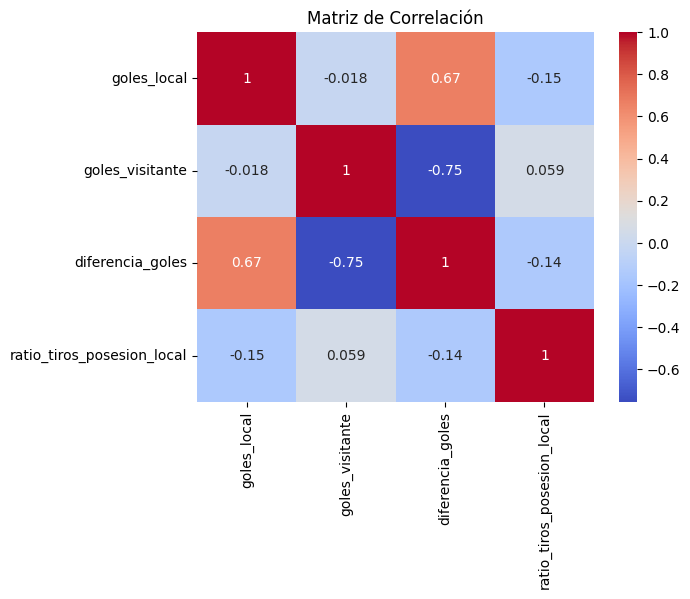

In [8]:
corr_vars = ['goles_local', 'goles_visitante', 'diferencia_goles', 'ratio_tiros_posesion_local']
corr_matrix = df[corr_vars].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()